In [1]:
data_dir = './data/train_data.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(data_dir, index_col=0)

In [4]:
df.head()

,stock_id,time_id,alpha_time,beta_time,book_kurt,book_skew,log_volume,mean_logtime,order_mean,order_std,...,shift_ratio,shift_std,sigma,sigma_mean,spread_kurt,spread_mean,spread_skew,spread_std,trade_impact,target
0,0,5,0.050380,0.174265,0.007629,0.026514,0.035063,0.943416,0.022148,0.015094,...,0.593180,0.006898,0.004499,0.065248,0.010011,0.066576,0.026382,0.031956,0.421919,0.004136
1,0,11,0.096677,0.845970,0.007387,0.026936,0.102071,0.982827,0.007390,0.007865,...,0.812863,0.008493,0.001204,0.011702,0.010885,0.020666,0.080775,0.022965,0.376186,0.001445
2,0,16,0.989200,0.985355,0.006981,0.023311,0.039368,0.994824,0.021316,0.013535,...,0.991944,0.007234,0.002369,0.012486,0.010236,0.042966,0.019015,0.015643,0.354362,0.002168
3,0,31,0.796320,0.531626,0.007096,0.031630,0.018559,0.990192,0.095781,0.041700,...,0.965184,0.007062,0.002574,0.015367,0.010438,0.060936,0.043633,0.060858,0.089499,0.002195
4,0,62,0.940945,0.968397,0.013284,0.057840,0.307853,0.986450,0.109210,0.043204,...,0.690482,0.014763,0.001894,0.010211,0.008786,0.021896,0.028323,0.017671,0.155979,0.001747


In [5]:
y = df.target
x = df.drop("target", axis=1)

In [6]:
df = pd.read_csv(data_dir, index_col='Unnamed: 0')

df = df[['stock_id', 'time_id'] + 
        sorted([c for c in df.columns if c not in ['stock_id', 'time_id', 'target']]) + 
        ['target']]



df.to_csv(data_dir)

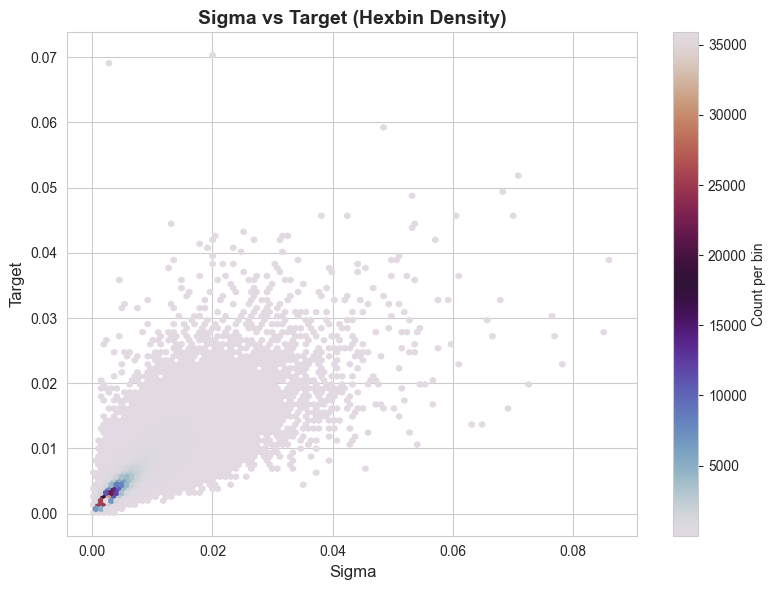

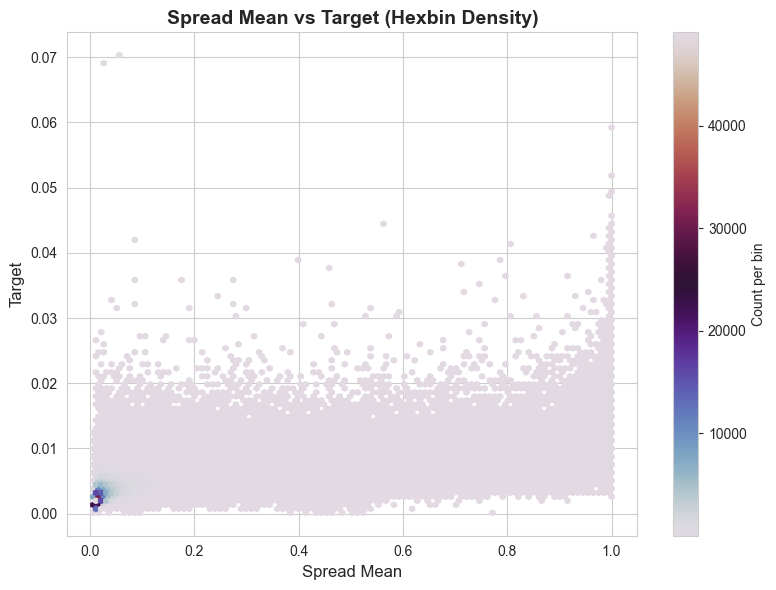

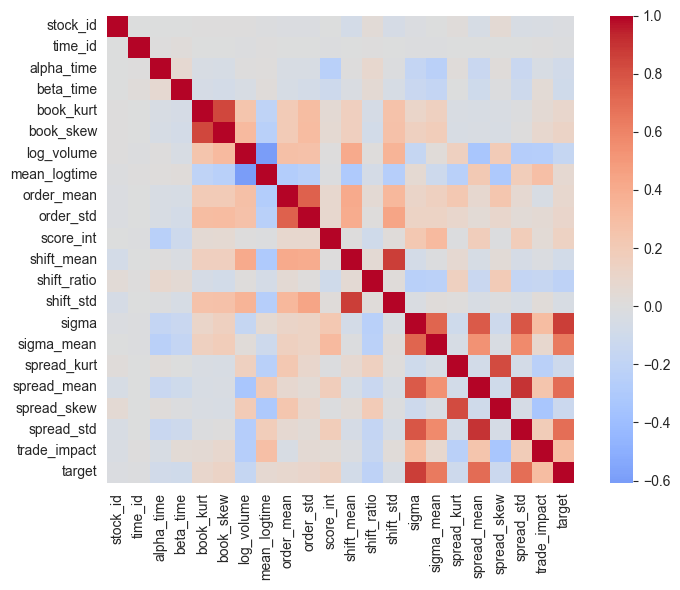

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

hexbin = ax.hexbin(df["sigma"], df["target"], 
                   gridsize=100,
                   cmap='twilight',
                   mincnt=1)

ax.set_title('Sigma vs Target (Hexbin Density)', fontsize=14, fontweight='bold')
ax.set_xlabel('Sigma', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
plt.colorbar(hexbin, ax=ax, label='Count per bin')
plt.tight_layout()

plt.show()
fig, ax = plt.subplots(figsize=(8, 6))

hexbin = ax.hexbin(df["spread_mean"], df["target"], 
                   gridsize=100,
                   cmap='twilight',
                   mincnt=1)

ax.set_title('Spread Mean vs Target (Hexbin Density)', fontsize=14, fontweight='bold')
ax.set_xlabel('Spread Mean', fontsize=12)
ax.set_ylabel('Target', fontsize=12)
plt.colorbar(hexbin, ax=ax, label='Count per bin')
plt.tight_layout()
plt.show()
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(df.select_dtypes(include=[np.number]).corr(), 
            annot=False, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            ax=ax)

plt.tight_layout()
plt.show()

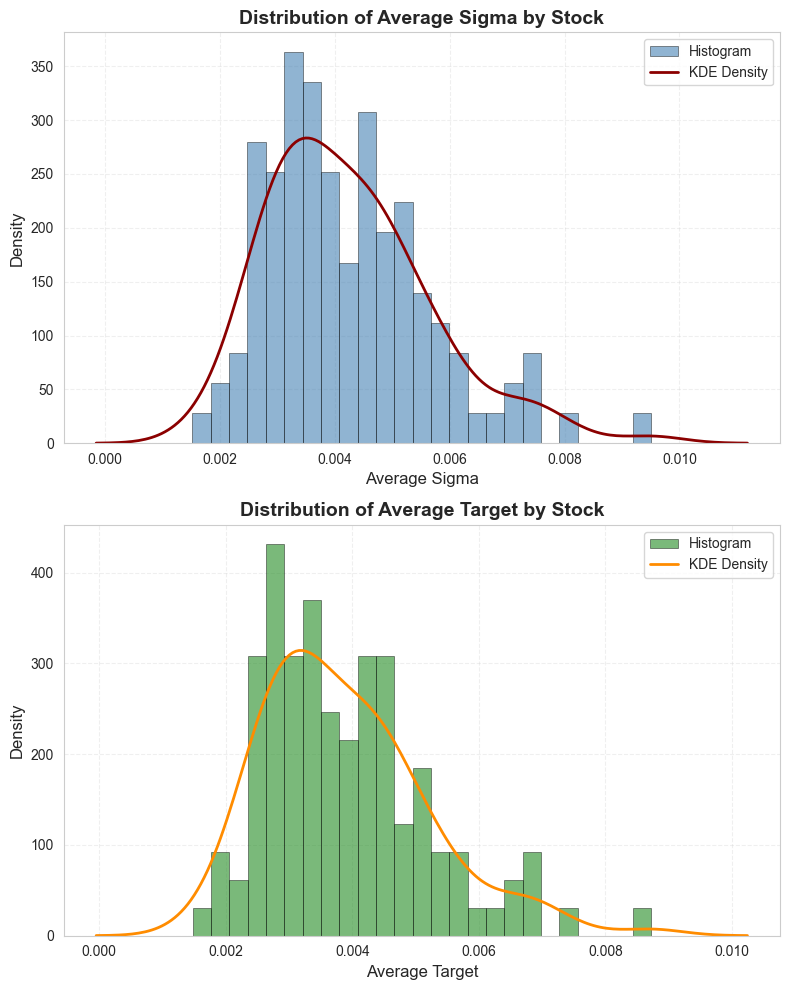

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sigma_by_stock = df.groupby("stock_id")["sigma"].mean()
target_by_stock = df.groupby("stock_id")["target"].mean()

fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=False)

sigma_by_stock.plot.hist(bins=25, 
                         density=True,
                         alpha=0.6, 
                         color='steelblue',
                         edgecolor='black',
                         linewidth=0.5,
                         ax=axes[0])

sns.kdeplot(data=sigma_by_stock, 
            color='darkred', 
            linewidth=2,
            ax=axes[0])

axes[0].set_title('Distribution of Average Sigma by Stock', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Average Sigma', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(['Histogram', 'KDE Density'])

target_by_stock.plot.hist(bins=25, 
                          density=True,
                          alpha=0.6, 
                          color='forestgreen',
                          edgecolor='black',
                          linewidth=0.5,
                          ax=axes[1])

sns.kdeplot(data=target_by_stock, 
            color='darkorange', 
            linewidth=2,
            ax=axes[1])

axes[1].set_title('Distribution of Average Target by Stock', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Target', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].legend(['Histogram', 'KDE Density'])

plt.tight_layout()
plt.show()